In [74]:
# import liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pickle

In [75]:
# read the data set
salary = pd.read_csv(r"C:\Users\Admin\Downloads\Deployment-flask-master\ML Model Basic\hiring.csv")

In [76]:
# data part
salary.head(10)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [77]:
# shape of the data set
salary.shape

(8, 4)

In [78]:
# info part
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
experience         6 non-null object
test_score         7 non-null float64
interview_score    8 non-null int64
salary             8 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 336.0+ bytes


In [79]:
# data stats part
salary.describe()

,test_score,interview_score,salary
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [80]:
# nan cal
salary.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

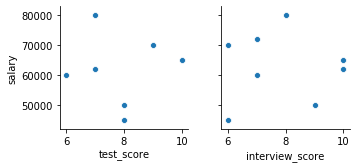

In [81]:
sns.pairplot(data = salary, x_vars= ['test_score','interview_score'], y_vars = 'salary')

In [82]:
# nan impute for 
salary['experience'].fillna(0, inplace=True)

In [83]:
# head part
salary.head(10)

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [84]:
#test score nan impute
salary["test_score"].fillna(salary["test_score"].mean(), inplace = True)

In [85]:
salary.head(10)

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


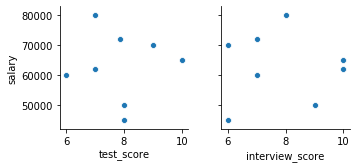

In [86]:
sns.pairplot(data = salary, x_vars= ['test_score','interview_score'], y_vars = 'salary')

In [87]:
# Indepent variable store
X = salary.iloc[:, :3]

In [88]:
# experience year to number funtion
def covert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return(word_dict[word])


In [89]:
# applying the function
X["experience"] = X["experience"].apply(lambda x : covert_to_int(x))

In [90]:
# X head part
X.head()

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6


In [91]:
# tarhet variable
y = salary.iloc[:,-1:]

In [92]:
# head party
y.head(10)

,salary
0,50000
1,45000
2,60000
3,65000
4,70000
5,62000
6,72000
7,80000


In [93]:
LR = LinearRegression()

In [94]:
# fit the model with data given (Training data)

LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# coff.
LR.coef_

array([[2827.63404314, 1912.93803053, 2196.9753141 ]])

In [96]:
# intercept
LR.intercept_

array([17237.33031373])

In [97]:
# Saving model to disk
pickle.dump(LR, open('rk_model.pkl','wb'))

In [98]:
# Loading model to compare the results
rk_model = pickle.load(open('rk_model.pkl','rb'))
print(rk_model.predict([[12, 9, 6]]))

[[81567.23299088]]


In [99]:
# Thank you